In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.6 MB/s eta 0:00:00


In [2]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 4.5 MB/s eta 0:00:00


In [3]:
from diffusers import StableDiffusionPipeline
import torch

model_ckpt = "arpachat/small-stable-diffusion-v0-th-1200-e5-g16-bs16"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [4]:
prompts = [
    "Tommy Hilfiger men's Embroidered Tommy Logo Green T-Shirt",
    "Tommy Hilfiger men's Soft Cotton Cable Knit Beige Sweater with Tommy Flag Logo",
    "Tommy Hilfiger men's Regular Fit Classic Wicking Red Polo",
    "Tommy Hilfiger men's Quarter-Zip Beige Sweatshirt with Tommy Flag Logo",
    "Tommy Hilfiger men's Embroidered Tommy Logo Grey Hoodie",
]
prompts = [
    "Quarter-Zip V-Neck Black Sweatshirt with Tommy Logo at the chest",
    "Solid Crewneck Navy Blue Crewneck polo with signature stripe tipping",
    "Embroidered Tommy Logo Green T-Shirt with textured boxy knit",
    "Slim Fit Stripe Classic White Polo with Tommy Flag Logo"
]

images = sd_pipeline(prompts, num_images_per_prompt=1, output_type="np").images

print(images.shape)
# (6, 512, 512, 3)

  0%|          | 0/50 [00:00<?, ?it/s]

(4, 512, 512, 3)


In [9]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")

def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)

sd_clip_score = calculate_clip_score(images, prompts)
print(f"CLIP score: {sd_clip_score}")

CLIP score: 33.7603


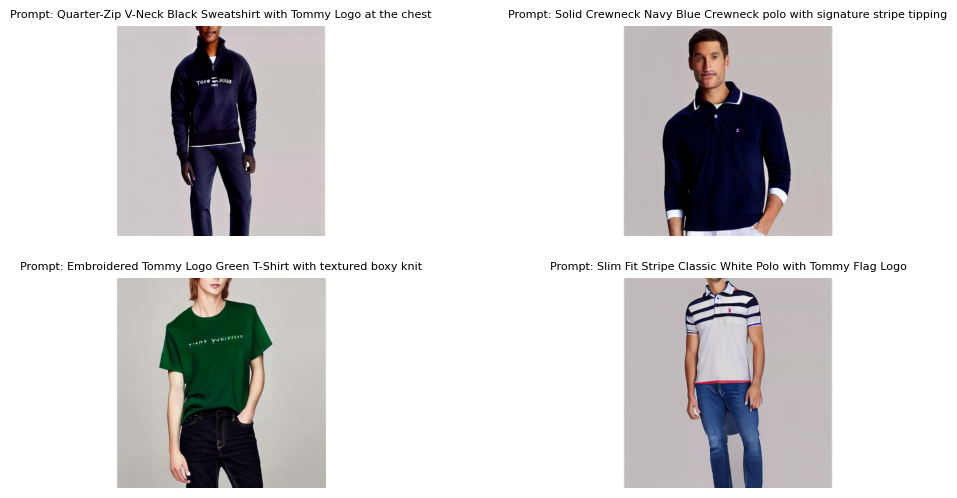

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for i, (image, ax) in enumerate(zip(images, axes.flatten())):
    ax.imshow(image)
    ax.set_title(f"Prompt: {prompts[i]}", fontsize=8)
    ax.axis("off")

plt.show()